In [1]:
import pandas as pd
police_killings = pd.read_csv("police_killings.csv", encoding = "ISO-8859-1")

In [2]:
police_killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367,54766,0.937936,3,3,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972,40930,0.683411,2,1,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365,54930,0.825869,2,3,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295,55909,0.863814,3,3,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785,49669,1.384868,5,4,1.9,0.063550,0.403954


In [3]:
counts = pd.value_counts(police_killings["raceethnicity"])

([<matplotlib.axis.XTick at 0x7f6cd9c23cc0>,
 <a list of 6 Text xticklabel objects>)

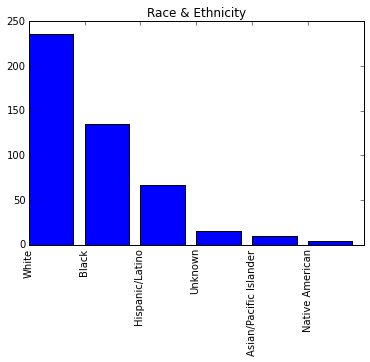

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(6), counts)
plt.title("Race & Ethnicity")
plt.xticks(range(6), counts.index, rotation="vertical")

In [5]:
counts/sum(counts)

White                     0.505353
Black                     0.289079
Hispanic/Latino           0.143469
Unknown                   0.032120
Asian/Pacific Islander    0.021413
Native American           0.008565
dtype: float64

### Summary
From the bar chart and percentage breakdown, 29% of total civilians that killed by polices is Black. This percentage is higher than the total Black population in US, 16%. Apart from that, Hispanic/Latino appears to be killed as frequent as its total population in US (14% versus 17%). 

In [6]:
income = police_killings["p_income"][police_killings["p_income"] != "-"]

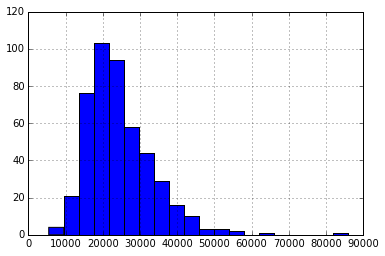

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
income = income.astype("int")
income.hist(bins=20)

In [8]:
income.median()

22348.0

According to [Wiki](https://en.wikipedia.org/wiki/Personal_income_in_the_United_States), the overall median  personal income for all individuals is 28,567, as opposed to our median which is $22,348. This means that shootings often occured in less affluent areas. 

In [26]:
state_pop = pd.read_csv("state_population.csv")
counts = police_killings["state_fp"].value_counts()
states = pd.DataFrame({"STATE": counts.index, "shootings": counts})
states.head()

,STATE,shootings
6,6,74
48,48,47
12,12,29
4,4,25
40,40,22


In [34]:
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3
2,40,4,9,2,Alaska,738432,552166,74.8
3,40,4,8,4,Arizona,6828065,5205215,76.2
4,40,3,7,5,Arkansas,2978204,2272904,76.3


In [27]:
states = states.merge(state_pop, on="STATE")
states.head()

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,6,74,40,4,9,California,39144818,30023902,76.7
1,48,47,40,3,7,Texas,27469114,20257343,73.7
2,12,29,40,3,5,Florida,20271272,16166143,79.7
3,4,25,40,4,8,Arizona,6828065,5205215,76.2
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4


In [28]:
states["pop_millions"] = states["POPESTIMATE2015"]/1000000
states.head()

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions
0,6,74,40,4,9,California,39144818,30023902,76.7,39.144818
1,48,47,40,3,7,Texas,27469114,20257343,73.7,27.469114
2,12,29,40,3,5,Florida,20271272,16166143,79.7,20.271272
3,4,25,40,4,8,Arizona,6828065,5205215,76.2,6.828065
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4,3.911338


In [30]:
states["rate"] = states["shootings"]/states["pop_millions"]
states.sort("rate")

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
43,9,1,40,1,1,Connecticut,3590886,2826827,78.7,3.590886,0.278483
22,42,7,40,1,2,Pennsylvania,12802503,10112229,79.0,12.802503,0.546768
38,19,2,40,2,4,Iowa,3123899,2395103,76.7,3.123899,0.640226
6,36,13,40,1,2,New York,19795791,15584974,78.7,19.795791,0.656705
29,25,5,40,1,1,Massachusetts,6794422,5407335,79.6,6.794422,0.735898
42,33,1,40,1,1,New Hampshire,1330608,1066610,80.2,1.330608,0.751536
45,23,1,40,1,1,Maine,1329328,1072948,80.7,1.329328,0.752260
11,17,11,40,2,3,Illinois,12859995,9901322,77.0,12.859995,0.855366
12,39,10,40,2,3,Ohio,11613423,8984946,77.4,11.613423,0.861073
31,55,5,40,2,3,Wisconsin,5771337,4476711,77.6,5.771337,0.866350


### Summary
From the data frame, we know that Connecticut has least police killings per million people whereas Oklahoma has highest.

In [37]:
pk = police_killings[(police_killings["share_white"] != "-") &
                    (police_killings["share_black"] != "-") &
                    (police_killings["share_hispanic"] != "-")]

In [45]:
columns = ["share_white", "share_black", "share_hispanic"]
pk[columns] = pk[columns].astype(float)

/opt/dsserver/lib/python3.4/site-packages/pandas/core/frame.py:2131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [47]:
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]
ls = pk[pk["state"].isin(lowest_states)]
hs = pk[pk["state"].isin(highest_states)]

In [49]:
columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]
ls[columns].mean()

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

In [50]:
hs[columns].mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64

### Summary
From the results, we find that the states with the lowest shooting rate have higher percentage of Blacks than the states with the highest shooting rate have. The states with the highest shooting rate have higher percentage of Hispanics. The median household income in the states with the lowest shooting rate are higher. 